### Problem Statement
A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.


A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 


In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.


They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

Which variables are significant in predicting the demand for shared bikes.
How well those variables describe the bike demands
Based on various meteorological surveys and people's styles, the service provider firm has gathered a large dataset on daily bike demands across the American market based on some factors. 



### importing the Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Reading the data and Checking the info

In [2]:
bike = pd.read_csv("Data/day.csv")
bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [3]:
# Checking the descriptive information
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [4]:
bike.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [5]:
# Checking the shape of df

print(bike.shape)

(730, 16)


### Insights
- The dataset comprises 730 observations and 16 variables.  
- Among these variables, one is in a date (datetime) format, whereas the rest are numeric (integer or float).  
- Preliminary inspection suggests that certain numeric variables may function as categorical features despite their numeric format.  
- Further statistical analysis will determine whether to recast these numeric attributes as categorical or retain them as continuous variables.  

### Data Quality Check

- Checking for NULL/MISSING values

In [6]:
# percentage of missing values in each column
round(100*(bike.isnull().sum()/len(bike)), 2).sort_values(ascending=False)

instant       0.0
dteday        0.0
season        0.0
yr            0.0
mnth          0.0
holiday       0.0
weekday       0.0
workingday    0.0
weathersit    0.0
temp          0.0
atemp         0.0
hum           0.0
windspeed     0.0
casual        0.0
registered    0.0
cnt           0.0
dtype: float64

In [7]:
# row-wise null count percentage
round((bike.isnull().sum(axis=1)/len(bike))*100,2).sort_values(ascending=False)

729    0.0
0      0.0
1      0.0
2      0.0
3      0.0
      ... 
14     0.0
13     0.0
12     0.0
11     0.0
10     0.0
Length: 730, dtype: float64

### Insights
- A comprehensive inspection reveals no missing or null entries across any rows or columns.  
- Consequently, no imputation strategies or additional preprocessing for handling incomplete data are required.

- Duplicacy Check

In [8]:
bike_dup = bike.copy()

# Checking for duplicates and dropping the entire duplicate row if any
bike_dup.drop_duplicates(subset=None, inplace=True)

In [9]:
bike_dup.shape

(730, 16)

In [10]:
bike.shape

(730, 16)

### Insights

- **Data Consistency Check**: Executing a duplicate-removal procedure did not alter the dimensions of the dataset.  
- **Inference**: This outcome verifies the absence of any duplicate entries in the original data.

### Data Cleaning
- Checking value_counts() for entire dataframe.

- This will help to identify any Unknow/Junk values present in the dataset.

In [11]:
#Creating a copy of the  dataframe, without the 'instant' column, 

#as this will have unique values, and donot make sense to do a value count on it.

bike_dummy=bike.iloc[:,1:16]

In [12]:
for col in bike_dummy:
    print(bike_dummy[col].value_counts(ascending=False), '\n\n\n')

dteday
31-12-2019    1
01-01-2018    1
02-01-2018    1
03-01-2018    1
04-01-2018    1
             ..
15-01-2018    1
14-01-2018    1
13-01-2018    1
12-01-2018    1
11-01-2018    1
Name: count, Length: 730, dtype: int64 



season
3    188
2    184
1    180
4    178
Name: count, dtype: int64 



yr
0    365
1    365
Name: count, dtype: int64 



mnth
1     62
3     62
7     62
5     62
12    62
10    62
8     62
4     60
9     60
6     60
11    60
2     56
Name: count, dtype: int64 



holiday
0    709
1     21
Name: count, dtype: int64 



weekday
1    105
2    105
3    104
4    104
5    104
6    104
0    104
Name: count, dtype: int64 



workingday
1    504
0    226
Name: count, dtype: int64 



weathersit
1    463
2    246
3     21
Name: count, dtype: int64 



temp
10.899153    5
26.035000    5
19.850847    4
17.937500    4
23.130847    4
            ..
11.515670    1
14.439134    1
14.828347    1
15.955847    1
17.254153    1
Name: count, Length: 498, dtype: int64 



atemp
32.7

### Insights
- A thorough review indicates no extraneous or unrecognized entries within the dataset.  
- As a result, specialized data-cleaning procedures for junk or unknown values are not required.

### Cleaning up the data

Taking a closer look, I identified and removed columns for 'instant', 'dteday', 'casual', and 'registered'. These columns were redundant or not pertinent to the analysis at hand.
- **Identified Redundancies**: A cursory examination of the data and corresponding data dictionary helped pinpoint certain fields that contribute limited or no analytical value.  
- **Excluded Variables**:  
  - **instant**: Serves only as an index placeholder and does not offer meaningful statistical insight.  
  - **dteday**: Represents the date, which is already decomposed into separate ‘year’ and ‘month’ variables, making this field redundant.  
  - **casual** and **registered**: Contain segment-wise bike bookings. Since our primary goal is to examine the total bike count, these segment-level variables can be removed. Moreover, a derived variable representing the ratio of these segments has been introduced for advanced exploration if needed.  
- **Preservation of Original Data**: The refined dataset is stored as **bike_new**, ensuring the original remains intact for potential future analysis or cross-validation.

In [13]:
bike.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [14]:
bike_new=bike[['season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt']]

In [15]:
bike_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 68.6 KB


### Dummy Variable Creation
- **Categorical Data Identification**: The variables *mnth*, *weekday*, *season*, and *weathersit* are recognized as categorical features despite being stored as numeric data types.  
- **Data Type Conversion**: To facilitate the creation of dummy variables, these columns are first cast into the *category* data type.  
- **Dummy Variable Generation**: After conversion, dummy (one-hot) encoding is performed on the categorical columns to enable advanced statistical modeling and avoid introducing inappropriate numeric relationships between categories.

In [16]:
# Check the datatypes before convertion
bike_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 68.6 KB


In [17]:
# Convert to 'category' data type

bike_new['season']=bike_new['season'].astype('category')
bike_new['weathersit']=bike_new['weathersit'].astype('category')
bike_new['mnth']=bike_new['mnth'].astype('category')
bike_new['weekday']=bike_new['weekday'].astype('category')

C:\Users\Soumyajit Bera\AppData\Local\Temp\ipykernel_8412\2440616350.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bike_new['season']=bike_new['season'].astype('category')
C:\Users\Soumyajit Bera\AppData\Local\Temp\ipykernel_8412\2440616350.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bike_new['weathersit']=bike_new['weathersit'].astype('category')
C:\Users\Soumyajit Bera\AppData\Local\Temp\ipykernel_8412\2440616350.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice

In [18]:
bike_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   season      730 non-null    category
 1   yr          730 non-null    int64   
 2   mnth        730 non-null    category
 3   holiday     730 non-null    int64   
 4   weekday     730 non-null    category
 5   workingday  730 non-null    int64   
 6   weathersit  730 non-null    category
 7   temp        730 non-null    float64 
 8   atemp       730 non-null    float64 
 9   hum         730 non-null    float64 
 10  windspeed   730 non-null    float64 
 11  cnt         730 non-null    int64   
dtypes: category(4), float64(4), int64(4)
memory usage: 49.7 KB


In [19]:
# This code does 3 things:
# 1) Create Dummy variable
# 2) Drop original variable for which the dummy was created
# 3) Drop first dummy variable for each set of dummies created.

bike_new = pd.get_dummies(bike_new, drop_first=True)
bike_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   yr            730 non-null    int64  
 1   holiday       730 non-null    int64  
 2   workingday    730 non-null    int64  
 3   temp          730 non-null    float64
 4   atemp         730 non-null    float64
 5   hum           730 non-null    float64
 6   windspeed     730 non-null    float64
 7   cnt           730 non-null    int64  
 8   season_2      730 non-null    bool   
 9   season_3      730 non-null    bool   
 10  season_4      730 non-null    bool   
 11  mnth_2        730 non-null    bool   
 12  mnth_3        730 non-null    bool   
 13  mnth_4        730 non-null    bool   
 14  mnth_5        730 non-null    bool   
 15  mnth_6        730 non-null    bool   
 16  mnth_7        730 non-null    bool   
 17  mnth_8        730 non-null    bool   
 18  mnth_9        730 non-null    

In [20]:
bike_new.shape

(730, 30)

### SPLITTING THE DATA
- **Data Partitioning**: The dataset is divided into training and testing subsets following a 70:30 split.  
- **Methodology**: Leveraging the *train_test_split* function from the *sklearn* library to create separate training and testing datasets.  
- **Rationale**: A designated portion of the data is reserved for validation, minimizing overfitting and providing an unbiased performance estimate of the final model.

In [21]:
from sklearn.model_selection import train_test_split

# We should specify 'random_state' so that the train and test data set always have the same rows, respectively

np.random.seed(0)
df_train, df_test = train_test_split(bike_new, train_size = 0.70, test_size = 0.30, random_state = 333)

In [22]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 510 entries, 483 to 366
Data columns (total 30 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   yr            510 non-null    int64  
 1   holiday       510 non-null    int64  
 2   workingday    510 non-null    int64  
 3   temp          510 non-null    float64
 4   atemp         510 non-null    float64
 5   hum           510 non-null    float64
 6   windspeed     510 non-null    float64
 7   cnt           510 non-null    int64  
 8   season_2      510 non-null    bool   
 9   season_3      510 non-null    bool   
 10  season_4      510 non-null    bool   
 11  mnth_2        510 non-null    bool   
 12  mnth_3        510 non-null    bool   
 13  mnth_4        510 non-null    bool   
 14  mnth_5        510 non-null    bool   
 15  mnth_6        510 non-null    bool   
 16  mnth_7        510 non-null    bool   
 17  mnth_8        510 non-null    bool   
 18  mnth_9        510 non-null    boo

In [23]:
df_train.shape

(510, 30)

In [24]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 219 entries, 22 to 313
Data columns (total 30 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   yr            219 non-null    int64  
 1   holiday       219 non-null    int64  
 2   workingday    219 non-null    int64  
 3   temp          219 non-null    float64
 4   atemp         219 non-null    float64
 5   hum           219 non-null    float64
 6   windspeed     219 non-null    float64
 7   cnt           219 non-null    int64  
 8   season_2      219 non-null    bool   
 9   season_3      219 non-null    bool   
 10  season_4      219 non-null    bool   
 11  mnth_2        219 non-null    bool   
 12  mnth_3        219 non-null    bool   
 13  mnth_4        219 non-null    bool   
 14  mnth_5        219 non-null    bool   
 15  mnth_6        219 non-null    bool   
 16  mnth_7        219 non-null    bool   
 17  mnth_8        219 non-null    bool   
 18  mnth_9        219 non-null    bool

In [25]:
df_test.shape

(219, 30)

### EXPLORATORY DATA ANALYSIS

- Focus on Training Subset: We will concentrate all Exploratory Data Analysis (EDA) efforts on the training dataset (df_train).
- Justification: By thoroughly examining this subset, we can unveil key insights, detect possible anomalies, and shape our modeling strategies without compromising the integrity of the test data.

In [26]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 510 entries, 483 to 366
Data columns (total 30 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   yr            510 non-null    int64  
 1   holiday       510 non-null    int64  
 2   workingday    510 non-null    int64  
 3   temp          510 non-null    float64
 4   atemp         510 non-null    float64
 5   hum           510 non-null    float64
 6   windspeed     510 non-null    float64
 7   cnt           510 non-null    int64  
 8   season_2      510 non-null    bool   
 9   season_3      510 non-null    bool   
 10  season_4      510 non-null    bool   
 11  mnth_2        510 non-null    bool   
 12  mnth_3        510 non-null    bool   
 13  mnth_4        510 non-null    bool   
 14  mnth_5        510 non-null    bool   
 15  mnth_6        510 non-null    bool   
 16  mnth_7        510 non-null    bool   
 17  mnth_8        510 non-null    bool   
 18  mnth_9        510 non-null    boo

In [27]:
df_train.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt', 'season_2', 'season_3', 'season_4', 'mnth_2', 'mnth_3', 'mnth_4',
       'mnth_5', 'mnth_6', 'mnth_7', 'mnth_8', 'mnth_9', 'mnth_10', 'mnth_11',
       'mnth_12', 'weekday_1', 'weekday_2', 'weekday_3', 'weekday_4',
       'weekday_5', 'weekday_6', 'weathersit_2', 'weathersit_3'],
      dtype='object')

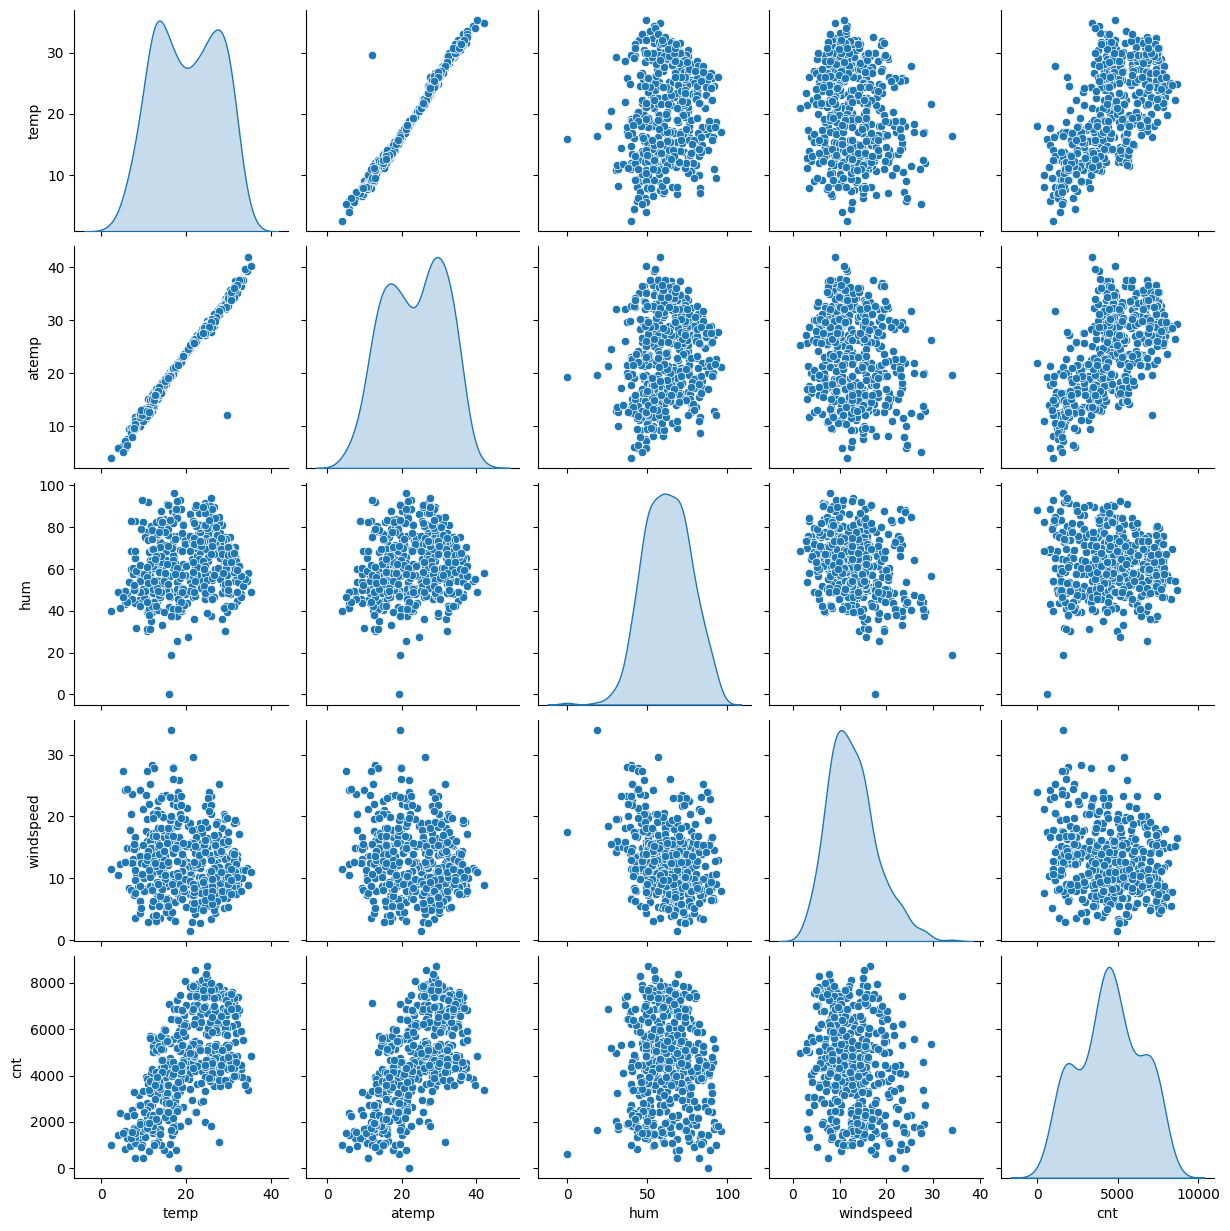

In [28]:
# Create a new dataframe of only numeric variables:

bike_num=df_train[[ 'temp', 'atemp', 'hum', 'windspeed','cnt']]

sns.pairplot(bike_num, diag_kind='kde')
plt.show()

### Insights
- Graphical Observation: Visual assessment of the pair plot reveals a clear linear association between both temp and atemp when paired against cnt.
- Statistical Implication: This linear pattern suggests that as temperature and apparent temperature rise, the bike count (i.e., cnt) demonstrates a proportional increase, warranting further investigation into potential linear modeling approaches.

### Visualising Catagorical Variables

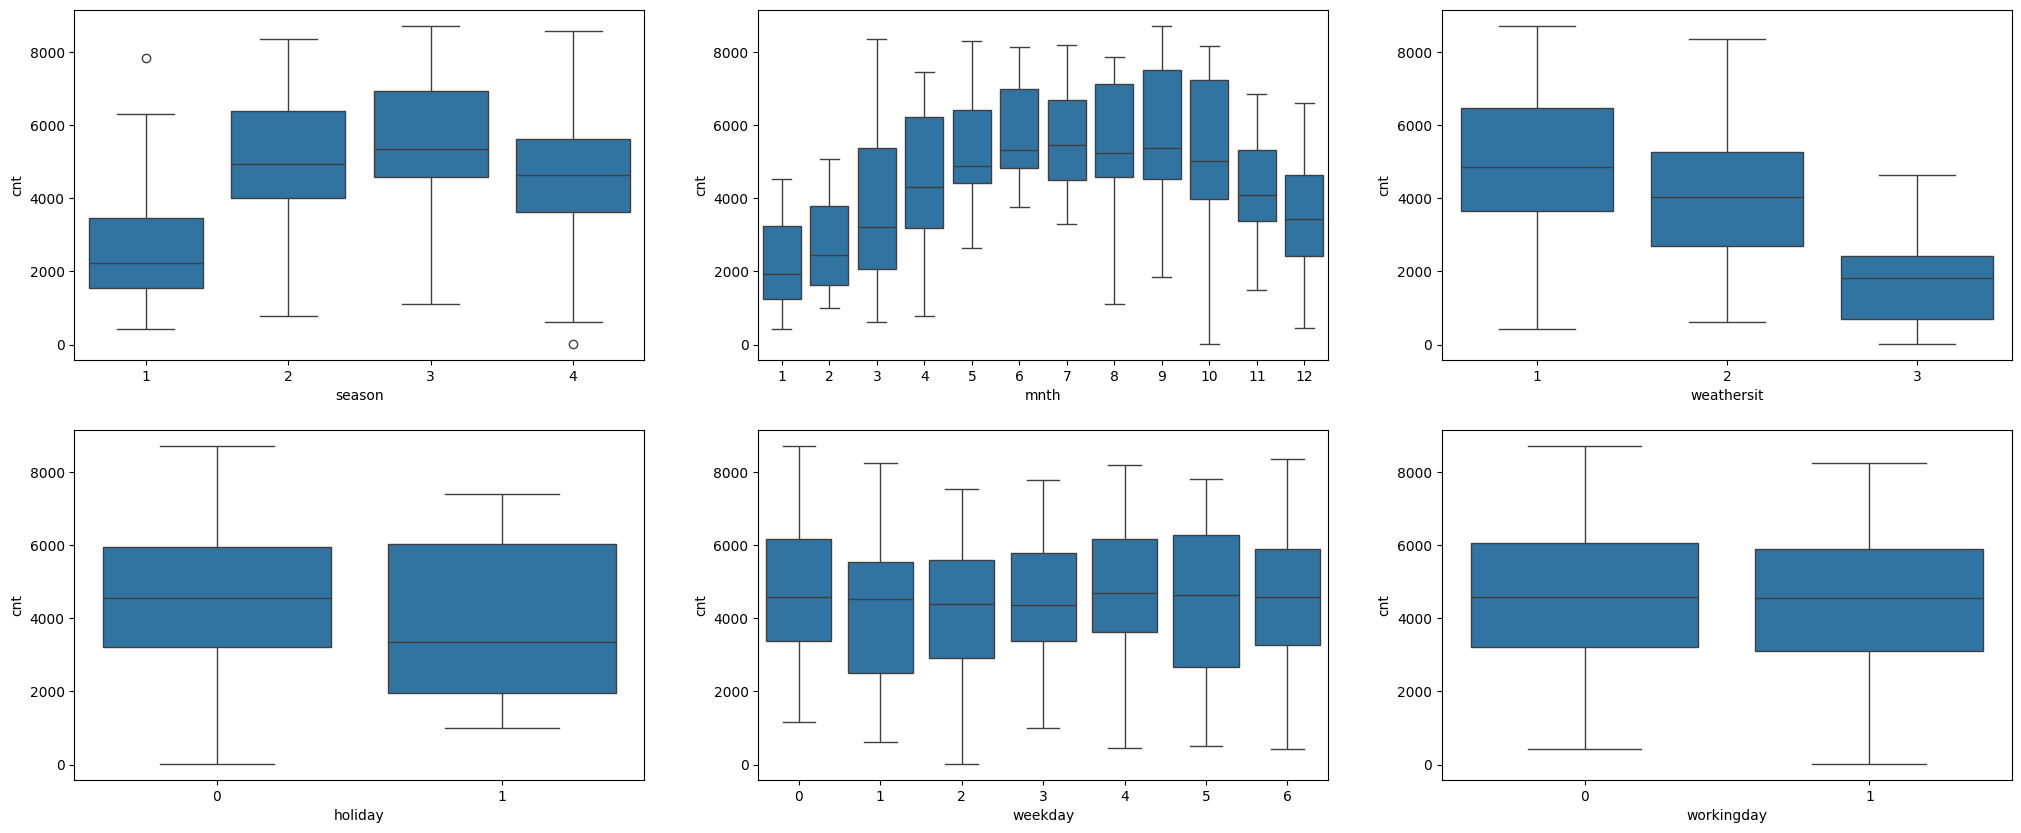

In [29]:
# Build boxplot of all categorical variables (before creating dummies) againt the target variable 'cnt' 
# to see how each of the predictor variable stackup against the target variable.

plt.figure(figsize=(25, 10))
plt.subplot(2,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = bike)
plt.subplot(2,3,2)
sns.boxplot(x = 'mnth', y = 'cnt', data = bike)
plt.subplot(2,3,3)
sns.boxplot(x = 'weathersit', y = 'cnt', data = bike)
plt.subplot(2,3,4)
sns.boxplot(x = 'holiday', y = 'cnt', data = bike)
plt.subplot(2,3,5)
sns.boxplot(x = 'weekday', y = 'cnt', data = bike)
plt.subplot(2,3,6)
sns.boxplot(x = 'workingday', y = 'cnt', data = bike)
plt.show()

### Insights
- **Categorical Variables**: Six distinct categorical features were examined to assess their influence on *cnt* via box plots.  

- **season**:  
  - *Season3* accounts for approximately 32% of overall bike bookings, showing a median count above 5000 over two years.  
  - *Season2* and *Season4* follow with around 27% and 25%, respectively.  
  - *Statistical Implication*: The strong variability between seasons suggests that **season** is a potentially strong predictor.  

- **mnth**:  
  - Months *5, 6, 7, 8, and 9* each represent nearly 10% of total bookings, with median counts exceeding 4000 per month.  
  - *Statistical Implication*: A seasonal trend is evident, making **mnth** a relevant predictor.  

- **weathersit**:  
  - Roughly 67% of bookings occur under *weathersit1*, with a median close to 5000 across two years; *weathersit2* follows at 30%.  
  - *Statistical Implication*: This clear pattern indicates **weathersit** is a promising predictor.  

- **holiday**:  
  - Around 97.6% of bookings happen on non-holiday dates, resulting in skewed data.  
  - *Statistical Implication*: Minimal variance suggests **holiday** is unlikely to enhance the model’s predictive power.  

- **weekday**:  
  - Each day captures about 13.5%–14.8% of bookings, with medians between 4000 and 5000.  
  - *Statistical Implication*: The uniform distribution of bookings across weekdays may limit **weekday** as a predictive feature, though further model testing is advisable.  

- **workingday**:  
  - About 69% of bookings occur on working days, with a median approaching 5000.  
  - *Statistical Implication*: The notable discrepancy between working and non-working days points to **workingday** being a viable predictor.

### Correlation Matrix

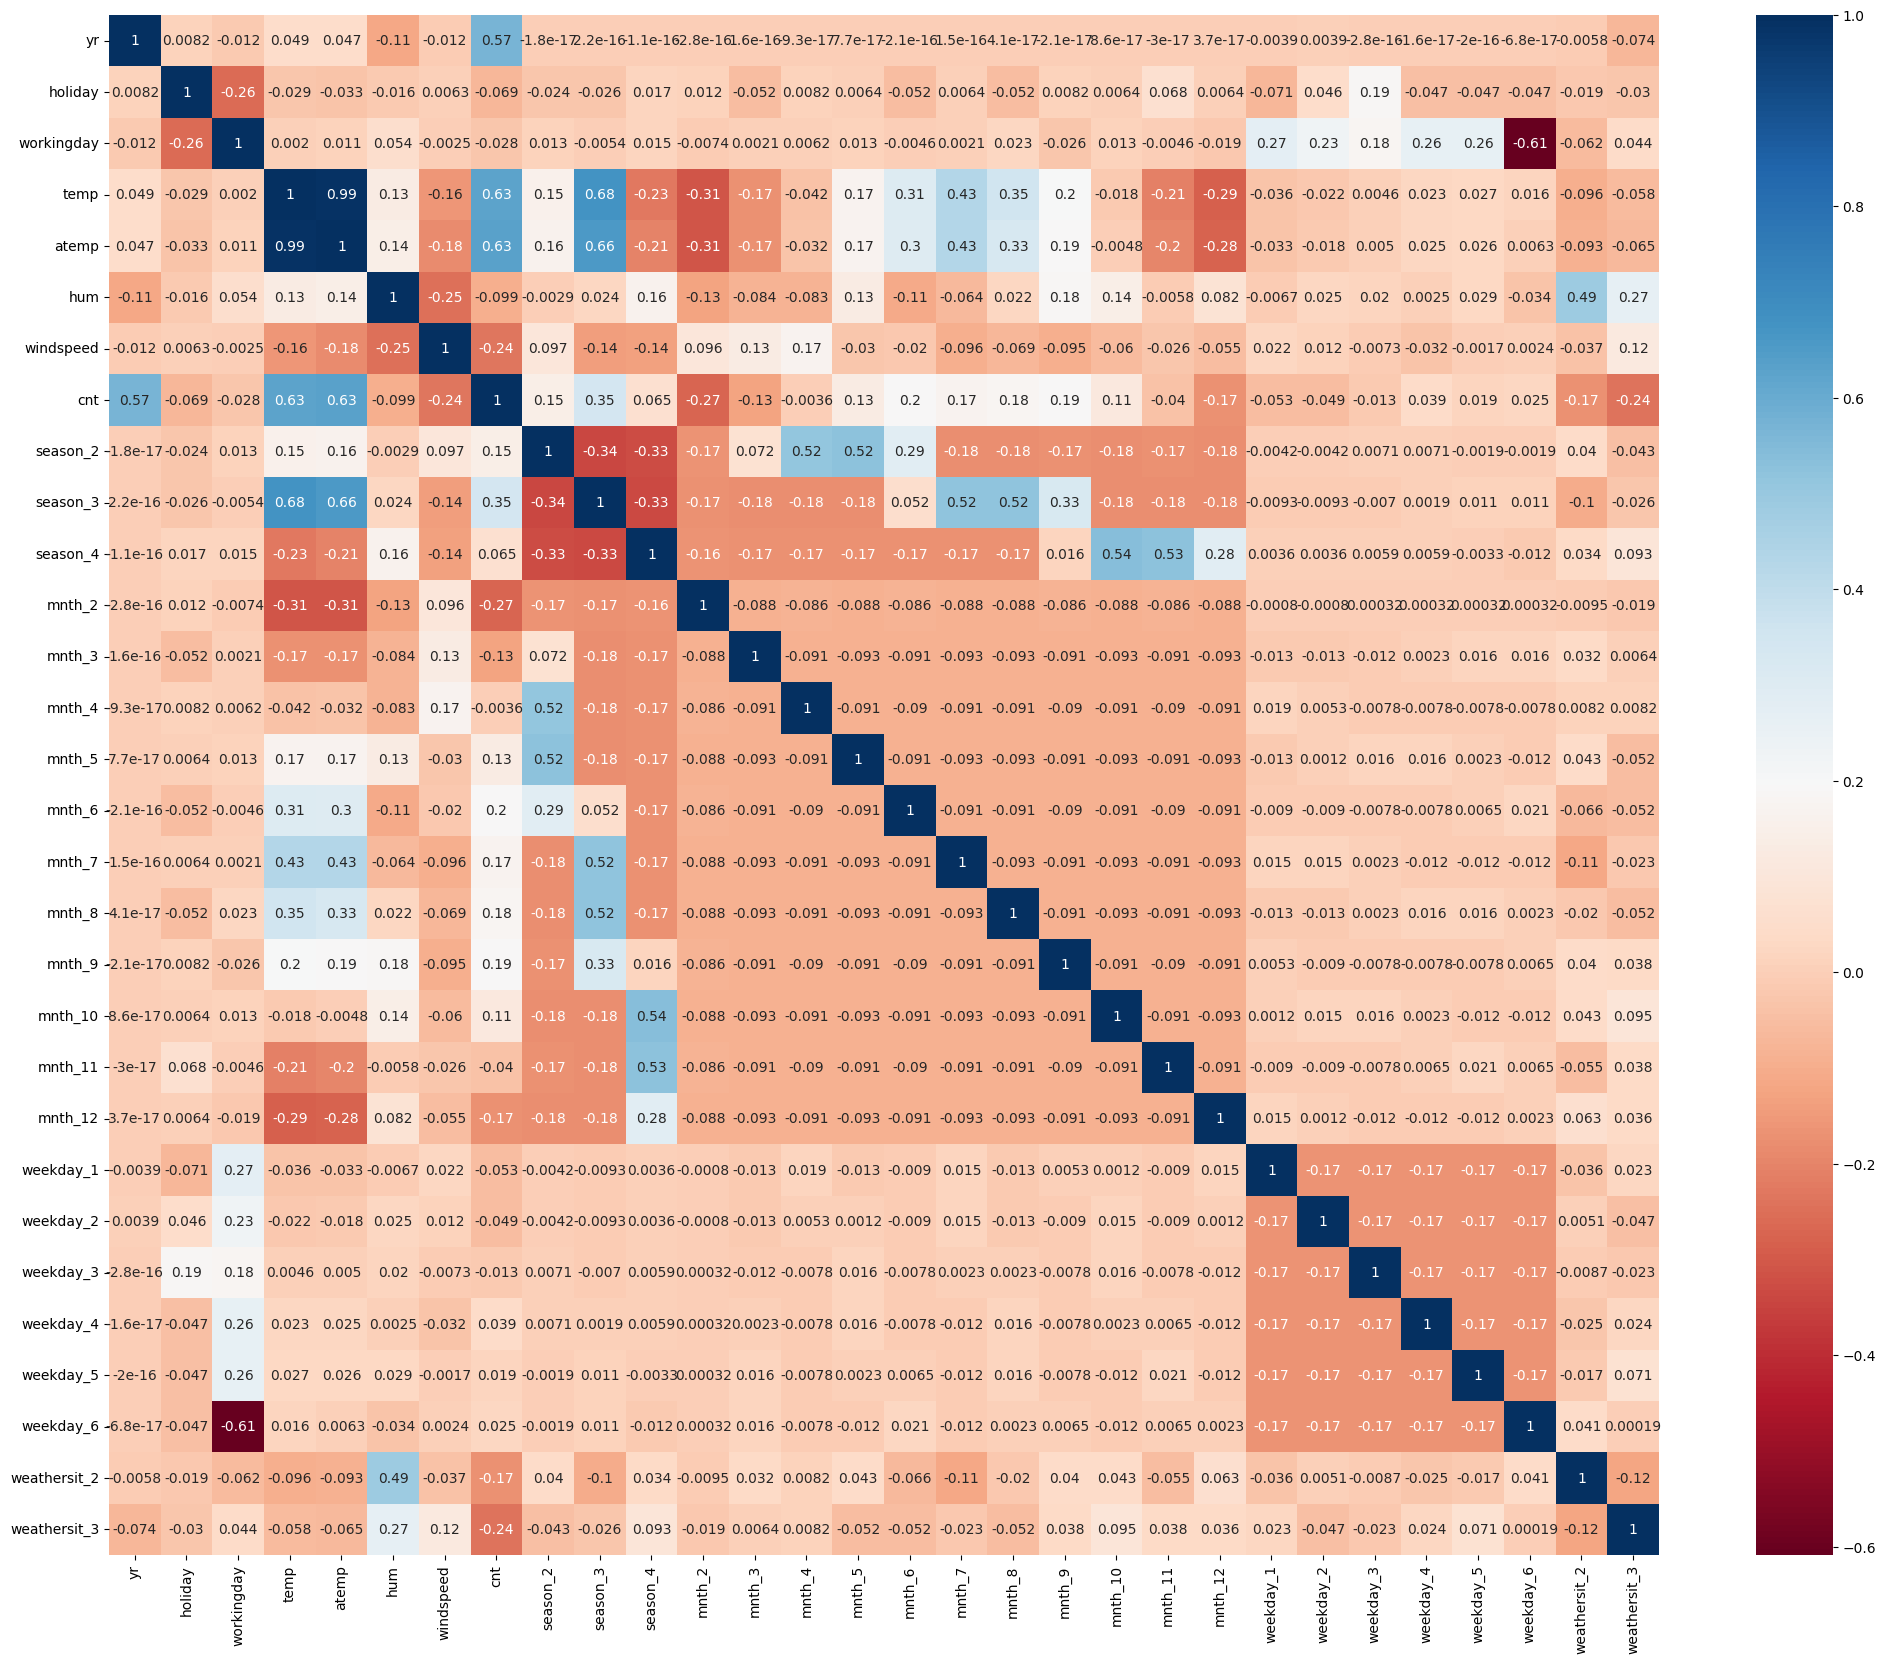

In [30]:
# Let's check the correlation coefficients to see which variables are highly correlated. Note:
# here we are considering only those variables (dataframe: bike_new) that were chosen for analysis

plt.figure(figsize = (25,20))
sns.heatmap(bike_new.corr(), annot = True, cmap="RdBu")
plt.show()

### Insights
- **Multicollinearity Detection**: The heatmap provides a concise visualization of pairwise correlations, highlighting variables that exhibit strong mutual dependencies.  
- **Relationship with Target**: It also underscores which predictors demonstrate substantial correlation with the target variable (*cnt*).  
- **Model-Building Utility**: This correlation matrix will serve as a reference throughout model development. In conjunction with metrics like VIF and p-values, it aids in selecting or discarding variables to mitigate multicollinearity and enhance model interpretability.  

### RESCALING THE FEATURES

In [31]:
from sklearn.preprocessing import MinMaxScaler

In [32]:
scaler = MinMaxScaler()

In [33]:
# Apply scaler() to all the numeric variables

num_vars = ['temp', 'atemp', 'hum', 'windspeed','cnt']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [34]:
df_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.501961,0.023529,0.692157,0.540901,0.515631,0.647390,0.346318,0.515144
std,0.500487,0.151726,0.462054,0.227898,0.213626,0.149722,0.160266,0.224281
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.343228,0.335807,0.536147,0.230784,0.359468
50%,1.000000,0.000000,1.000000,0.540519,0.525578,0.646367,0.325635,0.516337
75%,1.000000,0.000000,1.000000,0.740406,0.692378,0.757900,0.434287,0.685861
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### BUILDING A LINEAR MODEL


Dividing into X and Y sets for the model building

In [35]:
y_train = df_train.pop('cnt')
X_train = df_train

### RFE
Recursive feature elimination: We will be using the LinearRegression function from SciKit Learn for its compatibility with RFE (which is a utility from sklearn)

In [36]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [37]:
# Running RFE with the output number of the variable equal to 15
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(estimator=lm, n_features_to_select=15)      # running RFE
rfe = rfe.fit(X_train, y_train)

In [38]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', np.True_, np.int64(1)),
 ('holiday', np.False_, np.int64(11)),
 ('workingday', np.False_, np.int64(5)),
 ('temp', np.True_, np.int64(1)),
 ('atemp', np.True_, np.int64(1)),
 ('hum', np.True_, np.int64(1)),
 ('windspeed', np.True_, np.int64(1)),
 ('season_2', np.True_, np.int64(1)),
 ('season_3', np.True_, np.int64(1)),
 ('season_4', np.True_, np.int64(1)),
 ('mnth_2', np.False_, np.int64(10)),
 ('mnth_3', np.True_, np.int64(1)),
 ('mnth_4', np.False_, np.int64(8)),
 ('mnth_5', np.False_, np.int64(6)),
 ('mnth_6', np.False_, np.int64(7)),
 ('mnth_7', np.False_, np.int64(15)),
 ('mnth_8', np.False_, np.int64(9)),
 ('mnth_9', np.True_, np.int64(1)),
 ('mnth_10', np.True_, np.int64(1)),
 ('mnth_11', np.False_, np.int64(12)),
 ('mnth_12', np.False_, np.int64(13)),
 ('weekday_1', np.True_, np.int64(1)),
 ('weekday_2', np.True_, np.int64(1)),
 ('weekday_3', np.False_, np.int64(2)),
 ('weekday_4', np.False_, np.int64(4)),
 ('weekday_5', np.False_, np.int64(3)),
 ('weekday_6', np.False_

In [39]:
col = X_train.columns[rfe.support_]
col

Index(['yr', 'temp', 'atemp', 'hum', 'windspeed', 'season_2', 'season_3',
       'season_4', 'mnth_3', 'mnth_9', 'mnth_10', 'weekday_1', 'weekday_2',
       'weathersit_2', 'weathersit_3'],
      dtype='object')

In [40]:
X_train.columns[~rfe.support_]

Index(['holiday', 'workingday', 'mnth_2', 'mnth_4', 'mnth_5', 'mnth_6',
       'mnth_7', 'mnth_8', 'mnth_11', 'mnth_12', 'weekday_3', 'weekday_4',
       'weekday_5', 'weekday_6'],
      dtype='object')

In [41]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [42]:
X_train_rfe = X_train_rfe.apply(pd.to_numeric, errors='coerce')
# Then drop any rows that turned to NaN if needed
X_train_rfe.dropna(inplace=True)


In [43]:
X_train_rfe.info()

<class 'pandas.core.frame.DataFrame'>
Index: 510 entries, 483 to 366
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   yr            510 non-null    int64  
 1   temp          510 non-null    float64
 2   atemp         510 non-null    float64
 3   hum           510 non-null    float64
 4   windspeed     510 non-null    float64
 5   season_2      510 non-null    bool   
 6   season_3      510 non-null    bool   
 7   season_4      510 non-null    bool   
 8   mnth_3        510 non-null    bool   
 9   mnth_9        510 non-null    bool   
 10  mnth_10       510 non-null    bool   
 11  weekday_1     510 non-null    bool   
 12  weekday_2     510 non-null    bool   
 13  weathersit_2  510 non-null    bool   
 14  weathersit_3  510 non-null    bool   
dtypes: bool(10), float64(4), int64(1)
memory usage: 28.9 KB


In [44]:
X_train_rfe = X_train_rfe.astype(float)


### Building Linear Model using 'STATS MODEL'

### Model 1

### VIF Check

In [45]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [
    variance_inflation_factor(X_train_rfe.values, i) 
    for i in range(X_train_rfe.shape[1])
]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by="VIF", ascending=False)
print(vif)


        Features     VIF
1           temp  386.08
2          atemp  364.04
3            hum   16.13
6       season_3    7.11
4      windspeed    4.51
5       season_2    3.54
7       season_4    3.02
13  weathersit_2    2.15
0             yr    2.02
10       mnth_10    1.66
9         mnth_9    1.28
12     weekday_2    1.23
11     weekday_1    1.23
8         mnth_3    1.19
14  weathersit_3    1.18


In [46]:
import statsmodels.api as sm

# Add a constant
X_train_lm1 = sm.add_constant(X_train_rfe)

# Create a first fitted model
lr1 = sm.OLS(y_train, X_train_lm1).fit()

In [47]:
# Check the parameters obtained

lr1.params

const           0.238008
yr              0.228826
temp            0.394274
atemp           0.088717
hum            -0.170955
windspeed      -0.179931
season_2        0.132386
season_3        0.085290
season_4        0.152474
mnth_3          0.047074
mnth_9          0.100467
mnth_10         0.055654
weekday_1      -0.024262
weekday_2      -0.036756
weathersit_2   -0.047653
weathersit_3   -0.272332
dtype: float64

In [48]:
# Print a summary of the linear regression model obtained
print(lr1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     173.1
Date:                Mon, 03 Mar 2025   Prob (F-statistic):          1.36e-185
Time:                        18:28:47   Log-Likelihood:                 506.80
No. Observations:                 510   AIC:                            -981.6
Df Residuals:                     494   BIC:                            -913.9
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2380      0.028      8.437   

### Model 2
- Statistical Evaluation: The variable atemp exhibited a notably high p-value, indicating limited statistical significance in predicting the outcome.
- Multicollinearity Concern: Concurrently, its elevated VIF points to substantial correlation with other predictors, potentially distorting the regression coefficients.
- Model Simplification: Excluding atemp reduces redundant information, leading to a more parsimonious and stable model.

In [49]:
X_train_new = X_train_rfe.drop(["atemp"], axis = 1)

In [50]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,temp,23.19
2,hum,15.85
5,season_3,7.03
3,windspeed,4.35
4,season_2,3.54
6,season_4,3.01
12,weathersit_2,2.14
0,yr,2.02
9,mnth_10,1.66
8,mnth_9,1.28


In [51]:
# Add a constant
X_train_lm2 = sm.add_constant(X_train_new)

# Create a first fitted model
lr2 = sm.OLS(y_train, X_train_lm2).fit()

In [52]:
# Check the parameters obtained

lr2.params

const           0.239301
yr              0.228801
temp            0.478180
hum            -0.170199
windspeed      -0.183401
season_2        0.132551
season_3        0.083833
season_4        0.152847
mnth_3          0.047300
mnth_9          0.100500
mnth_10         0.055765
weekday_1      -0.023908
weekday_2      -0.036461
weathersit_2   -0.047855
weathersit_3   -0.272823
dtype: float64

In [53]:
# Print a summary of the linear regression model obtained
print(lr2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     185.7
Date:                Mon, 03 Mar 2025   Prob (F-statistic):          1.20e-186
Time:                        18:28:47   Log-Likelihood:                 506.59
No. Observations:                 510   AIC:                            -983.2
Df Residuals:                     495   BIC:                            -919.7
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2393      0.028      8.509   

### Model 3
- **Multicollinearity Concern**: *hum* displayed a notably high variance inflation factor (VIF), indicating significant overlap with other predictors.  
- **Domain-Based Judgment**: Despite *temp* also having a high VIF, domain knowledge emphasizes *temperature* as a critical business variable in a bike-rental context. Consequently, *hum* was removed to mitigate redundancy and retain the more business-relevant predictor.

In [54]:
X_train_new = X_train_new.drop(["hum"], axis = 1)

In [55]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,temp,15.20
4,season_3,6.69
2,windspeed,3.89
3,season_2,3.51
5,season_4,2.89
0,yr,2.01
8,mnth_10,1.66
11,weathersit_2,1.51
7,mnth_9,1.27
10,weekday_2,1.21


In [56]:
# Add a constant
X_train_lm3 = sm.add_constant(X_train_new)

# Create a first fitted model
lr3 = sm.OLS(y_train, X_train_lm3).fit()

In [57]:
lr3.params

const           0.141684
yr              0.232973
temp            0.446142
windspeed      -0.146573
season_2        0.134285
season_3        0.093151
season_4        0.149627
mnth_3          0.054857
mnth_9          0.092169
mnth_10         0.054644
weekday_1      -0.027920
weekday_2      -0.039708
weathersit_2   -0.076113
weathersit_3   -0.323355
dtype: float64

In [58]:
# Print a summary of the linear regression model obtained
print(lr3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     190.9
Date:                Mon, 03 Mar 2025   Prob (F-statistic):          1.86e-183
Time:                        18:28:47   Log-Likelihood:                 496.25
No. Observations:                 510   AIC:                            -964.5
Df Residuals:                     496   BIC:                            -905.2
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1417      0.018      7.702   

### Model 4
- **Multicollinearity Challenge**: *season3* exhibits a notably high variance inflation factor (VIF), suggesting substantial redundancy with other predictors.  
- **Domain Insight**: Although *temp* also shows an elevated VIF, temperature is pivotal in bike rental demand. Therefore, we chose to discard *season3* instead, preserving *temp* for its practical significance in the modeling process.

In [59]:
X_train_new = X_train_new.drop(["season_3"], axis = 1)

In [60]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,temp,4.05
2,windspeed,3.72
0,yr,2.00
4,season_4,1.94
7,mnth_10,1.63
3,season_2,1.56
10,weathersit_2,1.50
6,mnth_9,1.23
9,weekday_2,1.21
8,weekday_1,1.18


In [61]:
# Add a constant
X_train_lm4 = sm.add_constant(X_train_new)

# Create a first fitted model
lr4 = sm.OLS(y_train, X_train_lm4).fit()

In [62]:
# Check the parameters obtained

lr4.params

const           0.125234
yr              0.231122
temp            0.564492
windspeed      -0.151266
season_2        0.083200
season_4        0.117244
mnth_3          0.043118
mnth_9          0.104368
mnth_10         0.042721
weekday_1      -0.024960
weekday_2      -0.038079
weathersit_2   -0.076298
weathersit_3   -0.315252
dtype: float64

In [63]:
# Print a summary of the linear regression model obtained
print(lr4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.827
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     197.9
Date:                Mon, 03 Mar 2025   Prob (F-statistic):          1.66e-180
Time:                        18:28:47   Log-Likelihood:                 486.48
No. Observations:                 510   AIC:                            -947.0
Df Residuals:                     497   BIC:                            -891.9
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1252      0.018      6.828   

### Model 5
- **Statistical Significance**: *mnth_10* exhibits an excessively high p-value, implying minimal impact on the model’s predictive power. Eliminating this variable enhances model parsimony and clarity.

In [64]:
X_train_new = X_train_new.drop(["mnth_10"], axis = 1)

In [65]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,temp,3.95
2,windspeed,3.68
0,yr,1.99
3,season_2,1.56
9,weathersit_2,1.50
4,season_4,1.38
8,weekday_2,1.21
6,mnth_9,1.20
7,weekday_1,1.18
5,mnth_3,1.14


In [66]:
# Add a constant
X_train_lm5 = sm.add_constant(X_train_new)

# Create a first fitted model
lr5 = sm.OLS(y_train, X_train_lm5).fit()


In [67]:
# Check the parameters obtained

lr5.params

const           0.122966
yr              0.229933
temp            0.571723
windspeed      -0.154162
season_2        0.082012
season_4        0.132559
mnth_3          0.043741
mnth_9          0.097884
weekday_1      -0.025892
weekday_2      -0.037583
weathersit_2   -0.074658
weathersit_3   -0.309677
dtype: float64

In [68]:
# Print a summary of the linear regression model obtained
print(lr5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.825
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     213.5
Date:                Mon, 03 Mar 2025   Prob (F-statistic):          1.60e-180
Time:                        18:28:47   Log-Likelihood:                 483.73
No. Observations:                 510   AIC:                            -943.5
Df Residuals:                     498   BIC:                            -892.7
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1230      0.018      6.684   

### Model 6
- **Statistical Rationale**: The variable *mnth_3* shows a high p-value, suggesting limited statistical relevance in predicting the outcome.  
- **Model Refinement**: Eliminating *mnth_3* streamlines the model, retaining only those variables with stronger explanatory power.

In [69]:
X_train_new = X_train_new.drop(["mnth_3"], axis = 1)

In [70]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,temp,3.92
2,windspeed,3.54
0,yr,1.98
3,season_2,1.56
8,weathersit_2,1.48
4,season_4,1.36
7,weekday_2,1.21
5,mnth_9,1.19
6,weekday_1,1.18
9,weathersit_3,1.07


In [71]:
# Add a constant
X_train_lm6 = sm.add_constant(X_train_new)

# Create a first fitted model
lr6 = sm.OLS(y_train, X_train_lm6).fit()

In [72]:
# Check the parameters obtained

lr6.params

const           0.133572
yr              0.230548
temp            0.559947
windspeed      -0.153366
season_2        0.082154
season_4        0.126590
mnth_9          0.096227
weekday_1      -0.027623
weekday_2      -0.037692
weathersit_2   -0.073758
weathersit_3   -0.305450
dtype: float64

In [73]:
# Print a summary of the linear regression model obtained
print(lr6.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.823
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     231.3
Date:                Mon, 03 Mar 2025   Prob (F-statistic):          3.51e-180
Time:                        18:28:47   Log-Likelihood:                 480.10
No. Observations:                 510   AIC:                            -938.2
Df Residuals:                     499   BIC:                            -891.6
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1336      0.018      7.391   

### Model 7
- **Statistical Rationale**: The variable *weekday_1* shows a high p-value, suggesting limited statistical relevance in predicting the outcome.  
- **Model Refinement**: Eliminating *weekday_1* streamlines the model, retaining only those variables with stronger explanatory power.

In [74]:
X_train_new = X_train_new.drop(["weekday_1"], axis = 1)

In [75]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,temp,3.89
2,windspeed,3.46
0,yr,1.98
3,season_2,1.56
7,weathersit_2,1.48
4,season_4,1.36
5,mnth_9,1.19
6,weekday_2,1.18
8,weathersit_3,1.07


In [76]:
# Add a constant
X_train_lm7 = sm.add_constant(X_train_new)

# Create a first fitted model
lr7 = sm.OLS(y_train, X_train_lm7).fit()

In [77]:
# Check the parameters obtained

lr7.params

const           0.126950
yr              0.231030
temp            0.562780
windspeed      -0.153702
season_2        0.082293
season_4        0.127023
mnth_9          0.095767
weekday_2      -0.033065
weathersit_2   -0.073201
weathersit_3   -0.304969
dtype: float64

In [78]:
# Print a summary of the linear regression model obtained
print(lr7.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     254.3
Date:                Mon, 03 Mar 2025   Prob (F-statistic):          2.62e-180
Time:                        18:28:47   Log-Likelihood:                 477.53
No. Observations:                 510   AIC:                            -935.1
Df Residuals:                     500   BIC:                            -892.7
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1269      0.018      7.091   

### Model 8
- **Statistical Rationale**: The variable *weekday_2* shows a high p-value, suggesting limited statistical relevance in predicting the outcome.  
- **Model Refinement**: Eliminating *weekday_2* streamlines the model, retaining only those variables with stronger explanatory power.

In [79]:
X_train_new = X_train_new.drop(["weekday_2"], axis = 1)

In [80]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,temp,3.85
2,windspeed,3.43
0,yr,1.98
3,season_2,1.56
6,weathersit_2,1.48
4,season_4,1.35
5,mnth_9,1.19
7,weathersit_3,1.07


In [81]:
# Add a constant
X_train_lm8 = sm.add_constant(X_train_new)

# Create a first fitted model
lr8 = sm.OLS(y_train, X_train_lm8).fit()

In [82]:
# Check the parameters obtained

lr8.params

const           0.123599
yr              0.230940
temp            0.561392
windspeed      -0.155752
season_2        0.081982
season_4        0.126165
mnth_9          0.096124
weathersit_2   -0.073252
weathersit_3   -0.302187
dtype: float64

In [83]:
# Print a summary of the linear regression model obtained
print(lr8.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.818
Model:                            OLS   Adj. R-squared:                  0.815
Method:                 Least Squares   F-statistic:                     281.3
Date:                Mon, 03 Mar 2025   Prob (F-statistic):          7.32e-180
Time:                        18:28:47   Log-Likelihood:                 473.56
No. Observations:                 510   AIC:                            -929.1
Df Residuals:                     501   BIC:                            -891.0
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1236      0.018      6.872   

### Model Fit & Significance
- **R-squared** = 0.818, **Adjusted R-squared** = 0.815
This indicates our model explains about 81.5% of the variance in the target—strong performance.
- **F-statistic** = 127.8, p-value ≈ 7.32e-130
Highly significant overall model fit.
- All predictors have p < 0.05 (in fact, near zero), meaning each variable is statistically significant in explaining the target.
- All are well below 5, so no serious multicollinearity issues remain.
- **Residual Diagnostics**
- Omnibus = 60.317 (p = 0.000)
- Jarque-Bera = 115.462 (p = 0.000)
- These tests still suggest the residuals deviate from perfect normality. In practical terms:



### lr8 Model coefficient Values 

- const           0.123599
- yr              0.230940
- temp            0.561392
- windspeed      -0.155752
- season_2        0.081982
- season_4        0.126165
- mnth_9          0.096124
- weathersit_2   -0.073252
- weathersit_3   -0.302187

With an **F-statistic**  of 127.8(well above 1) and a **p-value** effectively at 0.0000, the results indicate that the model as a whole is statistically significant.

### The equation of best fitted surface based on model lr8

**cnt**=0.123599+(0.230940×**yr**)+(0.561392×**temp**)−(0.155752×**windspeed**)+(0.081982×**season_2**)+(0.126165×**season_4**)+(0.096124×**mnth_9**)−(0.073252×**weathersit_2**)−(0.302187×**weathersit_3**)

Here’s a detailed interpretation of each coefficient for your bike rental model:

- **const (0.123599):**  
  This is the baseline value. When all predictors are zero (or at their reference levels), the model predicts a bike rental increase of 0.123599 units.

- **yr (0.230940):**  
  A one unit increase in the variable **yr** (often coded as 0 for one year and 1 for the next) is associated with an increase of 0.230940 units in bike rentals. This suggests that the later year tends to have higher rentals compared to the base year.

- **temp (0.561392):**  
  For every one unit increase in **temp** (typically representing normalized or scaled temperature), bike rentals increase by 0.561392 units. This indicates that warmer conditions are associated with more bike hires.

- **windspeed (-0.155752):**  
  A one unit increase in **windspeed** is linked to a decrease of 0.155752 units in bike rentals. Higher wind speeds tend to reduce the number of rentals.

- **season_2 (0.081982):**  
  Compared to the reference season (often season_1), when **season_2** is active, bike rentals increase by 0.081982 units. This reflects a modest positive effect of season_2 on rentals.

- **season_4 (0.126165):**  
  Relative to the base season, **season_4** is associated with an increase of 0.126165 units in bike rentals, indicating that season_4 has a slightly stronger positive impact than season_2.

- **mnth_9 (0.096124):**  
  When **mnth_9** is in effect (compared to the baseline month, typically mnth_1), bike rentals increase by 0.096124 units. This shows that rentals tend to be higher in September (if mnth_9 represents September) relative to the reference month.

- **weathersit_2 (-0.073252):**  
  Compared to the reference weather condition (usually weathersit_1), **weathersit_2** is associated with a decrease of 0.073252 units in bike rentals. This suggests that the weather conditions represented by weathersit_2 slightly lower the number of hires.

- **weathersit_3 (-0.302187):**  
  Similarly, relative to the base weather condition, **weathersit_3** shows a stronger negative impact, with a one unit increase leading to a decrease of 0.302187 units in bike rentals. This indicates that the conditions in weathersit_3 are less favorable for renting bikes.

Each coefficient quantifies the expected change in bike rentals given a one unit change in that predictor, holding all other factors constant.

### ASSUMPTIONS
Residual Analysis Of Training Data

In [84]:
y_train_pred = lr8.predict(X_train_lm8)

C:\Users\Soumyajit Bera\AppData\Local\Temp\ipykernel_8412\1495069168.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((res), bins = 20)


Text(0.5, 0, 'Errors')

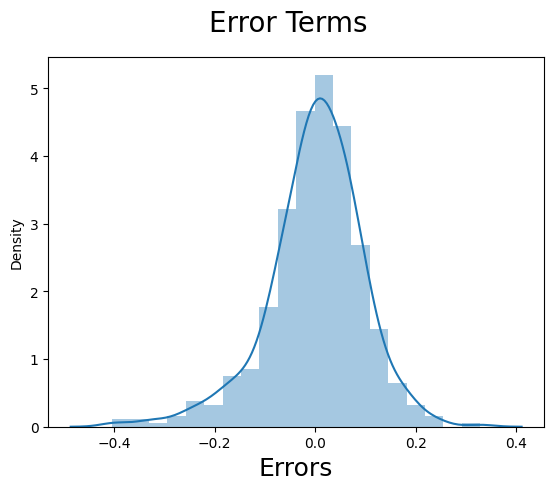

In [85]:
res = y_train-y_train_pred
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((res), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)  

### Insights 
The histogram indicates that the residuals follow a normal distribution, confirming that the linear regression assumption is satisfied.

### There is a linear relationship between X and Y

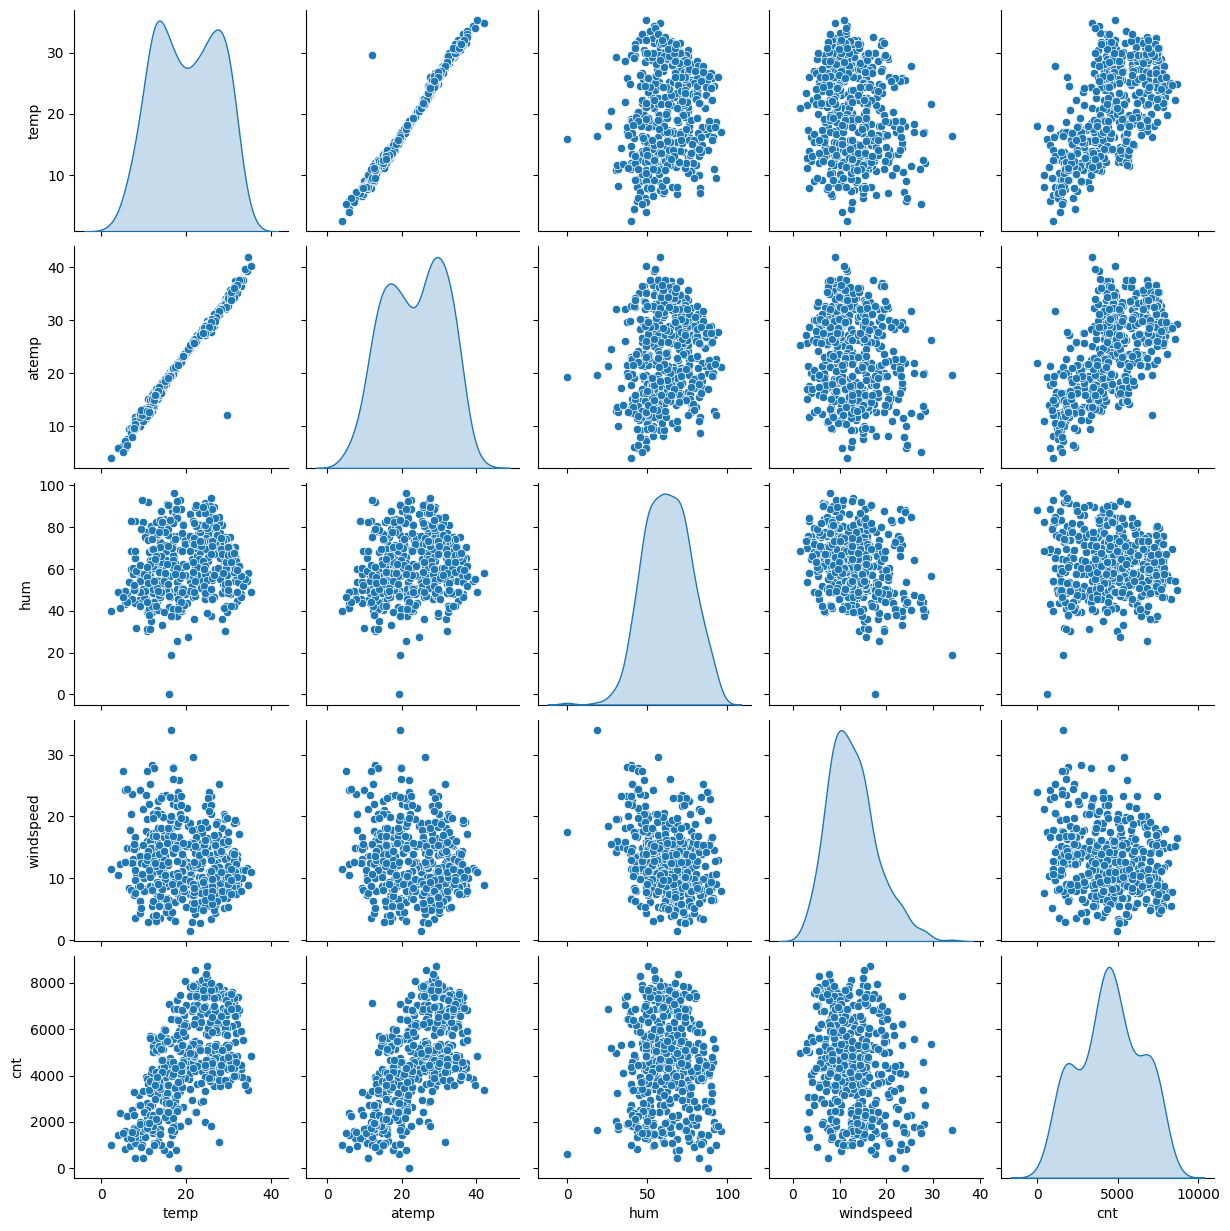

In [86]:
bike_new=bike_new[[ 'temp', 'atemp', 'hum', 'windspeed','cnt']]

sns.pairplot(bike_num, diag_kind='kde')
plt.show()

### Insights 
- **Visual Examination**: The pair plot reveals distinct linear relationships linking both *temp* and *atemp* to the response variable *cnt*.  
- **Modeling Implication**: These apparent linear associations suggest that *temp* and *atemp* could be influential predictors of bike count, warranting deeper analysis in the modeling process.

### Insights 
There is No Multicollinearity between the predictor variables

In [87]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,temp,3.85
2,windspeed,3.43
0,yr,1.98
3,season_2,1.56
6,weathersit_2,1.48
4,season_4,1.35
5,mnth_9,1.19
7,weathersit_3,1.07


### Insights 
- **Multicollinearity Check**: Examination via VIF (Variance Inflation Factor) reveals all predictor variables have VIF values below 5.  
- **Modeling Implication**: With the VIF results within the accepted threshold, multicollinearity concerns are minimal, supporting a more stable and interpretable regression model.

### Making Prediction
- **Predictive Stage**: Having verified the final model (*lr8*) through diagnostic checks, we proceed to apply it for generating outcome predictions.  
- **Model Utilization**: By inputting relevant test data into *lr8*, we can estimate the dependent variable (*cnt*), thereby evaluating the model’s predictive accuracy on unseen observations.

In [88]:
# Apply scaler() to all numeric variables in test dataset. Note: we will only use scaler.transform, 
# as we want to use the metrics that the model learned from the training data to be applied on the test data. 
# In other words, we want to prevent the information leak from train to test dataset.

num_vars = ['temp', 'atemp', 'hum', 'windspeed','cnt']

df_test[num_vars] = scaler.transform(df_test[num_vars])

In [89]:
df_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
22,0,0,1,0.046591,0.025950,0.453529,0.462217,0.110907,False,False,...,False,False,False,True,False,False,False,False,False,False
468,1,0,0,0.543115,0.536771,0.522511,0.347424,0.855729,True,False,...,False,False,False,False,False,False,False,False,False,False
553,1,0,1,0.951196,0.933712,0.596104,0.212829,0.534975,False,True,...,False,False,True,False,False,False,False,False,False,False
504,1,0,1,0.699909,0.662746,0.551083,0.478229,0.817648,True,False,...,False,False,True,False,False,False,False,False,False,False
353,0,0,1,0.407087,0.416610,0.618615,0.080770,0.428900,False,False,...,False,True,False,False,False,True,False,False,True,False


In [90]:
df_test.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.493151,0.041096,0.689498,0.551225,0.527528,0.662567,0.346706,0.518889
std,0.501098,0.198967,0.463759,0.229463,0.215434,0.143562,0.159553,0.219953
min,0.000000,0.000000,0.000000,0.046591,0.025950,0.301299,0.073090,0.055683
25%,0.000000,0.000000,0.000000,0.356479,0.348019,0.553031,0.232689,0.364703
50%,0.000000,0.000000,1.000000,0.557653,0.549198,0.662338,0.328208,0.525771
75%,1.000000,0.000000,1.000000,0.751309,0.709163,0.762338,0.435708,0.676887
max,1.000000,1.000000,1.000000,0.984424,0.980934,1.010390,0.824380,0.963300


In [91]:
y_test = df_test.pop('cnt')
X_test = df_test
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 219 entries, 22 to 313
Data columns (total 29 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   yr            219 non-null    int64  
 1   holiday       219 non-null    int64  
 2   workingday    219 non-null    int64  
 3   temp          219 non-null    float64
 4   atemp         219 non-null    float64
 5   hum           219 non-null    float64
 6   windspeed     219 non-null    float64
 7   season_2      219 non-null    bool   
 8   season_3      219 non-null    bool   
 9   season_4      219 non-null    bool   
 10  mnth_2        219 non-null    bool   
 11  mnth_3        219 non-null    bool   
 12  mnth_4        219 non-null    bool   
 13  mnth_5        219 non-null    bool   
 14  mnth_6        219 non-null    bool   
 15  mnth_7        219 non-null    bool   
 16  mnth_8        219 non-null    bool   
 17  mnth_9        219 non-null    bool   
 18  mnth_10       219 non-null    bool

In [94]:
#Selecting the variables that were part of final model.
col1=X_train_new.columns
X_test=X_test[col1]
# Adding constant variable to test dataframe
X_test_lm8 = sm.add_constant(X_test)
X_test_lm8.info()

<class 'pandas.core.frame.DataFrame'>
Index: 219 entries, 22 to 313
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   const         219 non-null    float64
 1   yr            219 non-null    int64  
 2   temp          219 non-null    float64
 3   windspeed     219 non-null    float64
 4   season_2      219 non-null    bool   
 5   season_4      219 non-null    bool   
 6   mnth_9        219 non-null    bool   
 7   weathersit_2  219 non-null    bool   
 8   weathersit_3  219 non-null    bool   
dtypes: bool(5), float64(3), int64(1)
memory usage: 9.6 KB


In [95]:
# Making predictions using the final model (lr6)

y_pred = lr8.predict(X_test_lm8)

### Model Evaluation

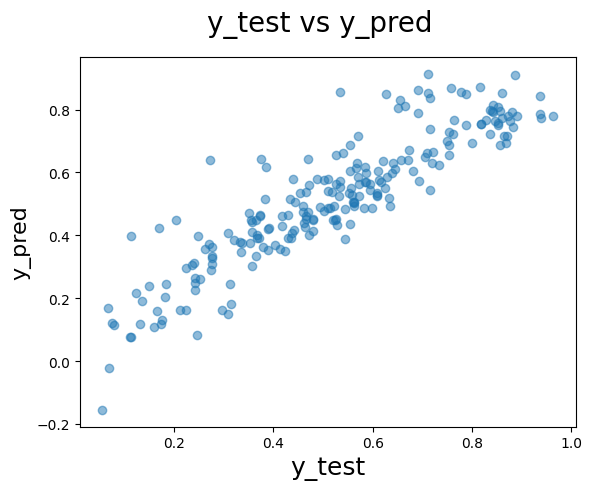

In [96]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred, alpha=.5)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16) 
plt.show()

### R^2 Value for TEST

In [97]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.8067023927509687

### Adjusted R^2 Value for TEST

In [98]:
# We already have the value of R^2 (calculated in above step)

r2=0.8067023927509687

In [99]:
# Get the shape of X_test
X_test.shape

(219, 8)

In [100]:
# n is number of rows in X

n = X_test.shape[0]


# Number of features (predictors, p) is the shape along axis 1
p = X_test.shape[1]

# We find the Adjusted R-squared using the formula

adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
adjusted_r2

0.799338674379577

- **Training Performance:**  
  - R² = 0.818  
  - Adjusted R² = 0.815

- **Testing Performance:**  
  - R² ≈ 0.807  
  - Adjusted R² ≈ 0.799

- **Key Insights:**  
  - The similarity between training and testing metrics indicates that the model generalizes well to new data.
  - There is no significant sign of overfitting, as the performance remains consistent across both datasets.

As per our final model, the top 3 predictor variables that influence bike bookings are:

- **Temperature (temp)**  
  A coefficient value of **0.561392** indicates that a unit increase in the temperature variable increases the bike hire numbers by approximately 0.5614 units.

- **Weather Situation 3 (weathersit_3)**  
  A coefficient value of **-0.302187** indicates that, with respect to the base weather condition (weathersit_1), a unit increase in weathersit_3 decreases the bike hire numbers by about 0.3022 units.

- **Year (yr)**  
  A coefficient value of **0.230940** suggests that moving from one year to the next (a unit increase in yr) increases the bike hire numbers by roughly 0.2309 units.

It is recommended to consider these variables as having utmost importance while planning to achieve maximum bookings.

The next best features that can also be considered are:

- **Season 2 (season_2)**  
  A coefficient value of **0.081982** indicates that, with respect to the base season, when season_2 is active, bike hire numbers increase by about 0.082 units.

- **Season 4 (season_4)**  
  A coefficient value of **0.126165** indicates that, relative to the base season, when season_4 is present, bike hire numbers increase by approximately 0.1262 units.

Additionally, note the following details for categorical variables:

#### NOTE:
- **Weather Situations:**  
  - **weathersit_1:** Clear, Few clouds, or Partly cloudy  
  - **weathersit_3:** Light Snow, Light Rain combined with Thunderstorm or Scattered clouds, or Light Rain with Scattered clouds

- **Seasons:**  
  - **season_2:** Typically represents one of the transitional or warmer seasons (e.g., Summer)  
  - **season_4:** Typically represents a colder season (e.g., Winter)


